# MNIST - Hello World of Deep Learning

**Problem statement:** 
<br><br>
Classify grayscale image of handwritten digits (28 x 28 pixels) into 10 categories (0 through 9).

---

In [1]:
import keras
print(keras.__version__)

from keras import models
from keras import layers
from keras.utils import to_categorical

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

2.2.4


In [3]:
import tensorflow as tf
print(tf.__version__)

1.14.0


**Import MNIST dataset**

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

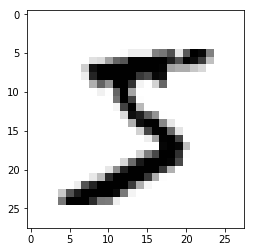

In [3]:
plt.imshow(train_images[0], cmap = plt.cm.binary)

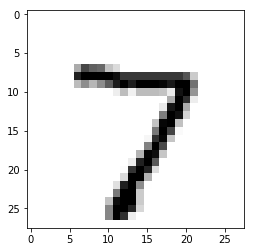

In [4]:
plt.imshow(test_images[0], cmap = plt.cm.binary)

**Preparing the image data**

In [5]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float')/255

**Preparing the labels**

In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

---

## Network: Dense Layers

**The network architecture**

In [7]:
network_dense = models.Sequential()
network_dense.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network_dense.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
network_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 401920
# Input is 28x28
# bias= 512
28*28*512+512

401920

Two Dense Layers.

**The compilation step**

In [10]:
network_dense.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

**Fit (train dataset)**

In [11]:
network_dense.fit(train_images, train_labels, epochs=5, batch_size = 128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.2592 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1036 - acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0690 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0496 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0378 - acc: 0.9887


Train Accurancy = 98.9%

**Evaluate (test dataset)**

In [12]:
# Evaluate
test_loss, test_acc = network_dense.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 86us/step
test_acc: 0.979


Test Accurancy = 98.0%

---

## Network: convnets

**Import MNIST dataset**

In [13]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Preparing the image data**

In [14]:
train_images = train_images.reshape((60000, 28, 28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

**Preparing the labels**

In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**The network architecture**

In [16]:
# convnet
model_convnet = models.Sequential()
model_convnet.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model_convnet.add(layers.MaxPooling2D((2,2)))
model_convnet.add(layers.Conv2D(64, (3,3), activation='relu'))
model_convnet.add(layers.MaxPooling2D((2,2)))
model_convnet.add(layers.Conv2D(64,(3,3), activation='relu'))

# add a dense layer
model_convnet.add(layers.Flatten())
model_convnet.add(layers.Dense(64, activation ='relu'))
model_convnet.add(layers.Dense(10,activation ='softmax'))

Note: input_shape = (28,28,1) => (image_height, image_width,image_channels)


Conv2D(output_depth, (window_height, window_width)) <br><br>
(window_height, window_width) =>typ. 3x3 (common choice) or 5x5 <br>
output_depth => Depth of the output feature map

In [17]:
model_convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

**The compilation step**

In [18]:
model_convnet.compile(optimizer='rmsprop', 
                      loss = 'categorical_crossentropy',
                      metrics=['accuracy'])

**Fit (train dataset)**

In [19]:
model_convnet.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1808 - acc: 0.9431
Epoch 2/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0489 - acc: 0.9847
Epoch 3/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0336 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0265 - acc: 0.9920
Epoch 5/5
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0201 - acc: 0.9938


Train Accurancy = 99.3%

**Evaluate (test dataset)**

In [20]:
# Evaluate
test_loss, test_acc = model_convnet.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 5s 463us/step
test_acc: 0.9908


Test Accurancy = 99.0%

# Note

The fundamental difference between a densely connected layer and a convolution layer is this: 
- Dense layers learn global patterns in their input feature space 
- Convolution layers learn local patterns

# [EOF]